# Prosper Loan Data Analysis

## Data overview 

* **This data set contains 113,937 loans with 81 columns including loan amount, borrower rate (or interest rate),      current loan status,borrower income, and many others. I chose only 20 columns that i needed in my analysis.**
 

## Purpose of Analysis 

### A - My Analysis will focus on answering these Questions:

  **1- Is home owner tend to borrow more than non-home owner?**
  
  **2- Is there any relation between amount of the loan and interest rate?**
  
  **3- Which loan category has the heighest amount of loans?**

  **4- Is there any effect of season on loans amounts?**

  **5- What is factors have most effect on the default on a loan (loan status , APR or monthly payments...)?**

  **6- What is the factors that affect most on estimated return?**

  **7- Is there in differenc on interest rate between student loan and non-students loan?**
  
### B- Building a model that predict if the loan will be default or not 

## Data wrangling

* **I perform some cleaning on my data and 900 rows with in consistent missing data and duplicated data.**

### Loading used libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline 

### Loading Data 

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

### Assessing data 

In [3]:
loan.shape

(113937, 31)

In [4]:
loan.head(3)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,CreditScoreRangeUpper,TotalCreditLinespast7years,DelinquenciesLast7Years,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,193129,8/26/2007,36,Completed,8/14/2009 0:00,0.16516,0.158,0.138,NaN,...,659.0,12.0,4.0,"$25,000-49,999",3083.333333,9425,9/12/2007 0:00,Q3 2007,330.43,258
1,10273602499503308B223C1,1209647,2/27/2014,36,Current,NaN,0.12016,0.092,0.082,0.0796,...,699.0,29.0,0.0,"$50,000-74,999",6125.000000,10000,3/3/2014 0:00,Q1 2014,318.93,1
2,0EE9337825851032864889A,81716,1/5/2007,36,Completed,12/17/2009 0:00,0.28269,0.275,0.240,NaN,...,499.0,3.0,0.0,Not displayed,2083.333333,3001,1/17/2007 0:00,Q1 2007,123.32,41


**Befor any analysis i will choose only relevant columns that help me answer my question**

In [5]:
## i choose columns only relevant to my questions
loan_data = loan[['ListingNumber','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate',
                  'EmploymentStatus','Occupation','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome',
                  'LoanOriginalAmount','MonthlyLoanPayment','ListingCategory (numeric)','EstimatedReturn','LoanOriginationDate',
                  'LoanOriginationQuarter','Investors']]

In [6]:
## using lowercase naming convention
loan_data.columns = loan_data.columns.str.lower()

In [7]:
## renaming my choosen columns to be more understandable

loan_data.rename(columns={'borrowerapr':'borrower_APR','borrowerrate':'interest_rate','incomerange':'income_range',
                          'statedmonthlyincome':'monthly_income',                          
                          'loanoriginalamount':'loan_amount' ,'loanoriginationdate':'loan_date',
                          'estimatedreturn':'estimated_return','loanoriginationquarter':'loan_quarter',
                          'monthlyloanpayment':'monthly_loan_payment','listingnumber':'listing_number',
                          'listingcategory (numeric)':'loan_category','isborrowerhomeowner':'home_owner',
                          'loanoriginationquarter':'loan_quarter','loanstatus':'loan_status',
                          'employmentstatus':'employment_status','listingcreationdate':'creation_date'},inplace=True)

/private/var/containers/Bundle/Application/79041220-00B6-4E5C-8FB2-C9DC847B721F/Carnets-sci.app/Library/lib/python3.9/site-packages/pandas-1.3.4-py3.9-macosx-11.5-x86_64.egg/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


**These are my chosen columns, So lets start assessing it ...**  

In [8]:
loan_data.head(3)

,listing_number,creation_date,term,loan_status,borrower_APR,interest_rate,employment_status,occupation,home_owner,income_range,monthly_income,loan_amount,monthly_loan_payment,loan_category,estimated_return,loan_date,loan_quarter,investors
0,193129,8/26/2007,36,Completed,0.16516,0.158,Self-employed,Other,True,"$25,000-49,999",3083.333333,9425,330.43,0,NaN,9/12/2007 0:00,Q3 2007,258
1,1209647,2/27/2014,36,Current,0.12016,0.092,Employed,Professional,False,"$50,000-74,999",6125.000000,10000,318.93,2,0.0547,3/3/2014 0:00,Q1 2014,1
2,81716,1/5/2007,36,Completed,0.28269,0.275,Not available,Other,False,Not displayed,2083.333333,3001,123.32,0,NaN,1/17/2007 0:00,Q1 2007,41


#### Assessing Categorical Data 

In [9]:
columns_cat = ['loan_status','employment_status','occupation','loan_category']

In [10]:
## encoding loan category column with category name rather than number to be more consistent and easy understandable

loan_cat = {'loan_category':{0 : 'Not_Available', 1: 'Debt Consolidation', 2 :'Home Improvement', 3 :'Business',
                             4: 'Personal Loan', 5 :'Student Use', 6 :'Auto', 7 :'Other', 8 :'Baby&Adoption', 9: 'Boat'
                             , 10 :'Cosmetic Procedure', 11: 'Engagement Ring', 12:'Green Loans', 13 :'Household Expenses',
                             14 :'Large Purchases', 15 :'Medical/Dental', 16:'Motorcycle', 
                             17 :'RV', 18 :'Taxes', 19:'Vacation', 20 :'Wedding Loans'}}

loan_data = loan_data.replace(loan_cat)

In [11]:
### loan_status 

loan_data.loan_status.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: loan_status, dtype: int64

In [12]:
## employment status 

loan_data['employment_status'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employment_status, dtype: int64

In [13]:
## occupation 
loan_data.occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: occupation, Length: 67, dtype: int64

In [14]:
## loan category 

loan_data.loan_category.value_counts()

Debt Consolidation    58308
Not_Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: loan_category, dtype: int64

#### Assessing Numberic Data 

In [15]:
columns_numeric = ['term','borrower_APR', 'interest_rate','income_range', 'monthly_income', 'loan_amount',
                   'monthly_loan_payment','estimated_return','loan_quarter', 'investors']

## Descriptive statistics for numerical vars
loan_data[columns_numeric].describe()

,term,borrower_APR,interest_rate,monthly_income,loan_amount,monthly_loan_payment,estimated_return,investors
count,113937.000000,113912.000000,113937.000000,1.139370e+05,113937.00000,113937.000000,84853.000000,113937.000000
mean,40.830248,0.218828,0.192764,5.608026e+03,8337.01385,272.475783,0.096068,80.475228
std,10.436212,0.080364,0.074818,7.478497e+03,6245.80058,192.697812,0.030403,103.239020
min,12.000000,0.006530,0.000000,0.000000e+00,1000.00000,0.000000,-0.182700,1.000000
25%,36.000000,0.156290,0.134000,3.200333e+03,4000.00000,131.620000,0.074080,2.000000
50%,36.000000,0.209760,0.184000,4.666667e+03,6500.00000,217.740000,0.091700,44.000000
75%,36.000000,0.283810,0.250000,6.825000e+03,12000.00000,371.580000,0.116600,115.000000
max,60.000000,0.512290,0.497500,1.750003e+06,35000.00000,2251.510000,0.283700,1189.000000


In [16]:
### checking for duplicate data  

loan_data.duplicated().sum()

871

In [17]:
### checking for null 

loan_data.isnull().sum()

listing_number              0
creation_date               0
term                        0
loan_status                 0
borrower_APR               25
interest_rate               0
employment_status        2255
occupation               3588
home_owner                  0
income_range                0
monthly_income              0
loan_amount                 0
monthly_loan_payment        0
loan_category               0
estimated_return        29084
loan_date                   0
loan_quarter                0
investors                   0
dtype: int64

## Cleaning Data

In [18]:
## remove duplicate data
loan_data.drop_duplicates(inplace=True)

In [19]:
## labeled null data in (employment_status) as not available rather than dropping it

loan_data['employment_status'].fillna('Not_available',inplace=True)

In [20]:
## labeled null data in (occupation) as not available rather than dropping it

loan_data['occupation'].fillna('Not_available',inplace=True)

In [21]:
## there is only 25 row with null borrower_APR that will not affect our analysis so i droped it 

loan_data.dropna(subset=['borrower_APR'],inplace=True)

In [22]:
## change of creation date and loan date to datetime data type

loan_data['loan_date'] = pd.to_datetime(loan_data['loan_date'])
loan_data['creation_date'] = pd.to_datetime(loan_data['creation_date'])

In [23]:
## create column of month of loan 

loan_data['month'] = pd.DatetimeIndex(loan_data['creation_date']).month
loan_data['month_name'] = loan_data['creation_date'].dt.month_name()
loan_data['quarter'] = loan_data['creation_date'].dt.quarter
loan_data['year'] = loan_data['creation_date'].dt.year

In [24]:
## encoding home owner values to be yes and no rather than True and False

home = {'home_owner':{True : 'Yes', False : 'No'}}

loan_data = loan_data.replace(home)

In [25]:
## sorting data by year
loan_data.sort_values("creation_date",inplace=True)


In [26]:
## creating ordered loan qurter string

## first i will change year and quarter into string

loan_data = loan_data.astype({'year':'string' , 'quarter':'string'},copy=True)

## then concate year and quarter to get quarter of year column 

loan_data['loan_quarter'] = 'Q' + loan_data.quarter +" "+ loan_data.year

In [27]:
loan_data.shape

(113041, 22)

### Note

**i will keep null data in estimated return for now and then i will handle cleaning it a lone later when come to analysis estimated return** 

# Exploratory Data Analysis 

## 1- Univariate Exploration

## Distribution Of Data 

### A- Numeric Variables

In [28]:
columns_numeric = ['term','borrower_APR', 'interest_rate','lower_credit_score','upper_credit_score', 
                    'monthly_income','previous_loans', 'loan_amount', 'monthly_loan_payment',
                   'estimated_return','loan_quarter', 'investors']

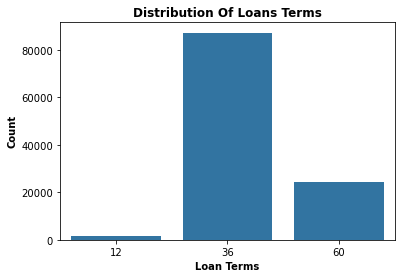

In [29]:
### 1- term

sb.countplot(data = loan_data ,x='term',color = sb.color_palette()[0] )
plt.xlabel('Loan Terms',weight = 'bold')
plt.ylabel('Count',weight = 'bold')
plt.title('Distribution Of Loans Terms',size=12,weight = 'bold'); 



**Term  has only 3 values (36 months ,60 months , 12 months) the most popular one is 36 months term for the loan**

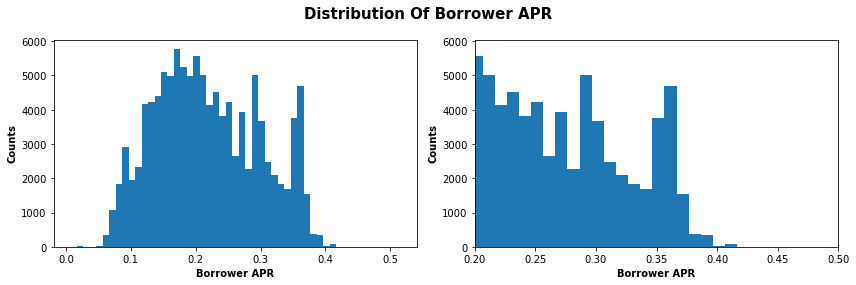

In [30]:
## 2- borrower_APR

plt.figure(figsize=[12,4])
bins=np.arange( 0.0065 ,0.5122 + 0.01,0.01)
plt.subplot(1,2,1)
plt.hist(data =loan_data ,x='borrower_APR',bins=bins)
plt.xlabel('Borrower APR',weight = 'bold')
plt.ylabel('Counts',weight = 'bold');
plt.subplot(1,2,2)
plt.hist(data =loan_data ,x='borrower_APR',bins=bins)
plt.xlabel('Borrower APR',weight = 'bold')
plt.ylabel('Counts',weight = 'bold')
plt.xlim(0.2,0.5);
plt.suptitle('Distribution Of Borrower APR',weight = 'bold',size=15)
plt.tight_layout()

**APR shaped normally dist except some spikes to the right represent the most popular APR percentage at 0.3579 ,0.3564 and 0.3745**

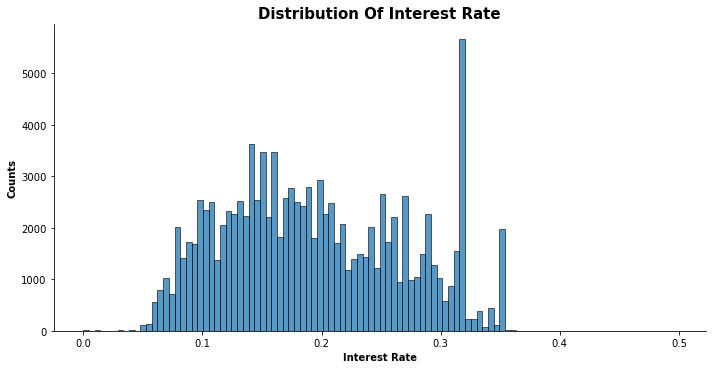

In [31]:
## 3- interest_rate 

sb.displot(data=loan_data ,x='interest_rate',height=5,aspect=2)
plt.xlabel('Interest Rate',weight = 'bold')
plt.ylabel('Counts',weight='bold')
plt.title('Distribution Of Interest Rate',weight='bold',size=15);

**interest rate nearly follow the same pattern like APR (normally dist with spikes on the right and this expected as   APR = interest rate + fees**

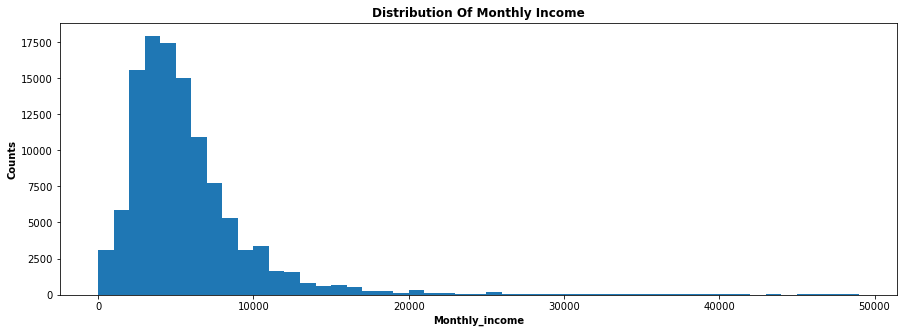

In [32]:
### 4- monthly income

plt.figure(figsize=[15,5])
bins=np.arange(0,50000,1000)
plt.hist(data = loan_data , x='monthly_income',bins=bins)
plt.xlabel('Monthly_income',weight='bold')
plt.ylabel('Counts',weight = 'bold');
plt.title('Distribution Of Monthly Income',weight='bold',size=12);

**The monthly income has a lot of outliers so it right skewed (min= 0 ,max=1750000) but the majority of data fall between 0 and 
20000 , this is a perfect case we should use**<span style='color:red '> **cube root transformation for the data** </span>

In [33]:
## creating calculated column of cube root of monthly income

loan_data['cr_m_income']= np.cbrt(loan_data['monthly_income'])

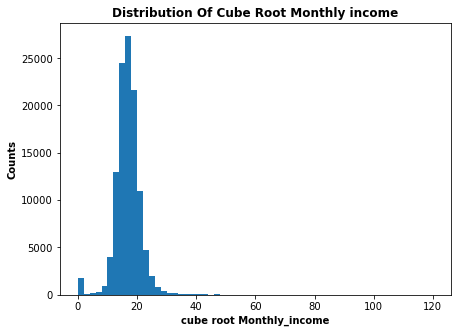

In [34]:
plt.figure(figsize=[7,5])
bins =np.arange(0,120+2,2)

plt.hist(data = loan_data , x='cr_m_income',bins=bins)
plt.xlabel('cube root Monthly_income',weight='bold')
plt.ylabel('Counts',weight='bold')
plt.title('Distribution Of Cube Root Monthly income',weight='bold',size=12);


**NOW the distribution of cube root is normally distributed with one value of outlier (income = 1750000 $ monthly)
and 61 person has monthly income above 64000**


In [35]:
loan_data.query('monthly_income < 8').iloc[:,6:14].employment_status.value_counts()

Not employed     762
Full-time        360
Self-employed    339
Not available     78
Part-time         60
Employed          44
Not_available     39
Retired           12
Other              6
Name: employment_status, dtype: int64

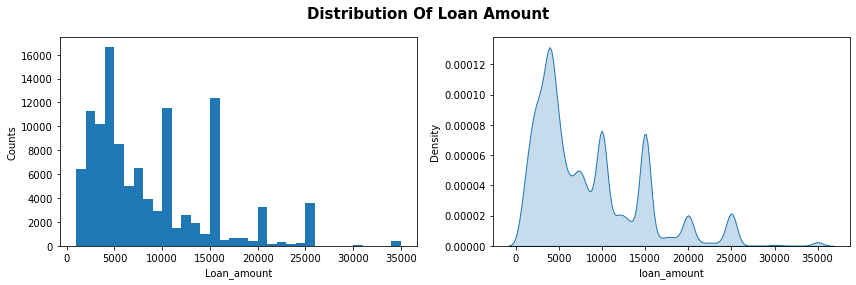

In [36]:
## 5-loan amount

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
bins=np.arange(1000,35000+1000 ,1000)
plt.hist(data=loan_data ,x='loan_amount',bins=bins)
plt.xlabel('Loan_amount')
plt.ylabel('Counts')
plt.subplot(1,2,2)
sb.kdeplot(data = loan_data ,x='loan_amount',shade=True)
plt.suptitle('Distribution Of Loan Amount',weight='bold' ,size=15)
plt.tight_layout()

**Generally the data are right skewed with some spikes, These spikes represent the most popular loan amounts which are 
 ( 5000 ,10000 ,15000  ,20000 ,25000$) dollars**
 


In [37]:
### creating column for cube root of loan amount

loan_data['cr_loan_amount'] = np.cbrt(loan_data['loan_amount'])

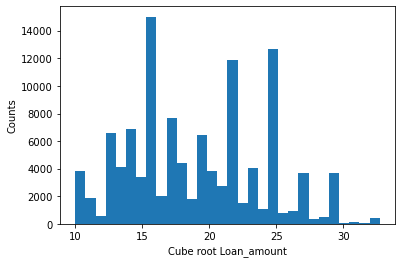

In [38]:
plt.hist(data=loan_data ,x='cr_loan_amount',bins=30)
plt.xlabel('Cube root Loan_amount')
plt.ylabel('Counts');


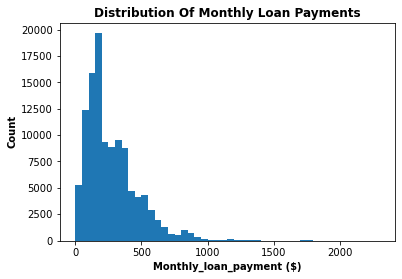

In [39]:
## 6- monthly loan payments 

bins = np.arange(0,2251.51+50 , 50)
plt.hist(data = loan_data ,x='monthly_loan_payment',bins=bins)
plt.xlabel('Monthly_loan_payment ($)',weight='bold')
plt.ylabel('Count',weight='bold')
plt.title('Distribution Of Monthly Loan Payments',weight='bold',size=12);


**AS usual the price or money data are right skewed with most popular values between 0 and 1000 $**

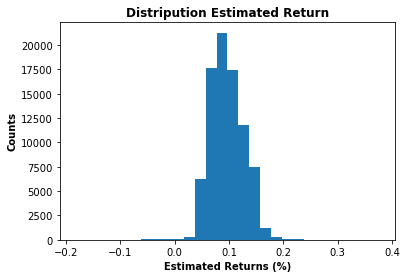

In [40]:
## 7- estimated return 

bins = np.arange(-0.182700 ,0.283700 +0.1 , 0.02)
plt.hist(data = loan_data ,x='estimated_return',bins=bins)
plt.xlabel('Estimated Returns (%)',weight='bold')
plt.ylabel('Counts',weight='bold')
plt.title('Distripution Estimated Return',weight='bold',size=12);

**Estimated return rates varies from( -18.27% to 28.37%)**

### B-Categorical Variables

In [41]:
## categorical vars 

columns_cat = ['loan_status','employment_status','occupation','loan_category','home_owner','month_name']

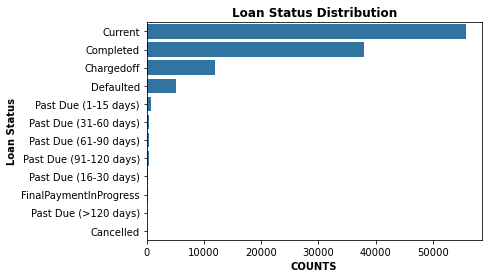

In [42]:
## 1-Loan status

order = loan_data.loan_status.value_counts().index
sb.countplot(data =loan_data , y='loan_status' ,order =order ,color = sb.color_palette()[0])
plt.xlabel('COUNTS' ,weight = 'bold')
plt.ylabel('Loan Status',weight ='bold')
plt.title('Loan Status Distribution',size = 12 ,weight = 'bold');

**Most of loan are currently in progress**

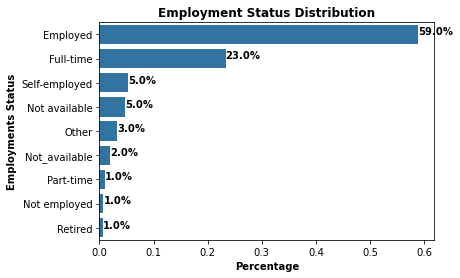

In [43]:
## 2- employment status

## counting values of each status

employ_stat_count = loan_data.employment_status.value_counts()/loan_data.employment_status.shape[0]
employ_values = employ_stat_count.values
order =  loan_data.employment_status.value_counts().index


sb.barplot(y=employ_stat_count.index ,x=employ_stat_count.values,order = order ,color = sb.color_palette()[0])
plt.xlabel('Percentage' ,weight = 'bold')
plt.ylabel('Employments Status',weight ='bold')
plt.title('Employment Status Distribution',size = 12 ,weight = 'bold')
for i in range(len(employ_values)):
    text = str(employ_values[i].round(2)*100) + '%'
    plt.text(x=employ_values[i],y=i ,s=text ,ha='left',weight = 'bold');

**85% of borrowers are full-time employed**

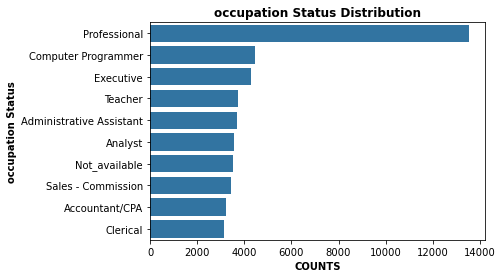

In [44]:
## 3-occpation 

order =  loan_data.occupation.value_counts().index[1:11]
sb.countplot(data = loan_data ,y='occupation' ,order = order ,color = sb.color_palette()[0])
plt.xlabel('COUNTS' ,weight = 'bold')
plt.ylabel('occupation Status',weight ='bold')
plt.title('occupation Status Distribution',size = 12 ,weight = 'bold');

**Due to large number of categorical levels in occupation i chose only top 10 occupations** 

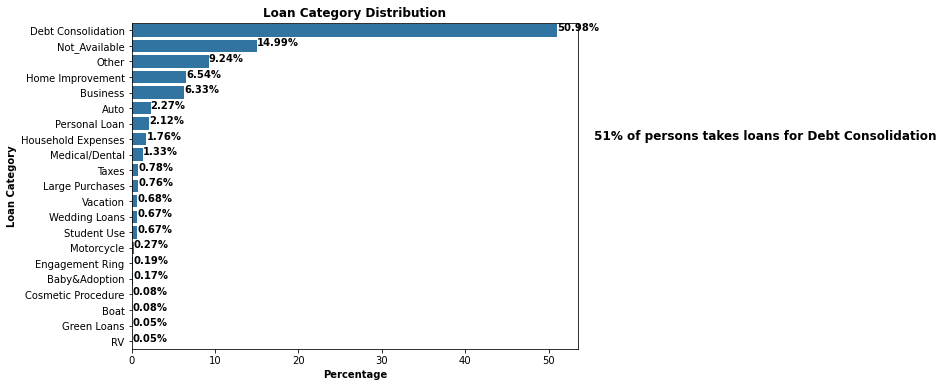

In [45]:
## 4- loan category

#calculating percentage of each category

loan_cat_percent = ((loan_data.loan_category.value_counts()/loan_data.loan_category.shape[0])*100).round(2)


plt.figure(figsize=[8,6])
sb.barplot(x=loan_cat_percent.values , y=loan_cat_percent.index ,color = sb.color_palette()[0])

plt.xlabel('Percentage',weight='bold')
plt.ylabel('Loan Category',weight='bold')
plt.title('Loan Category Distribution',weight='bold',size = 12)
text3=' 51% of persons takes loans for Debt Consolidation'
plt.text(55,7,text3,size=12,weight='bold')
for i in range(len(loan_cat_percent)):
    text = str(loan_cat_percent[i]) +'%'
    plt.text(x=loan_cat_percent[i] ,y=i ,s=text ,ha = 'left',weight='bold');

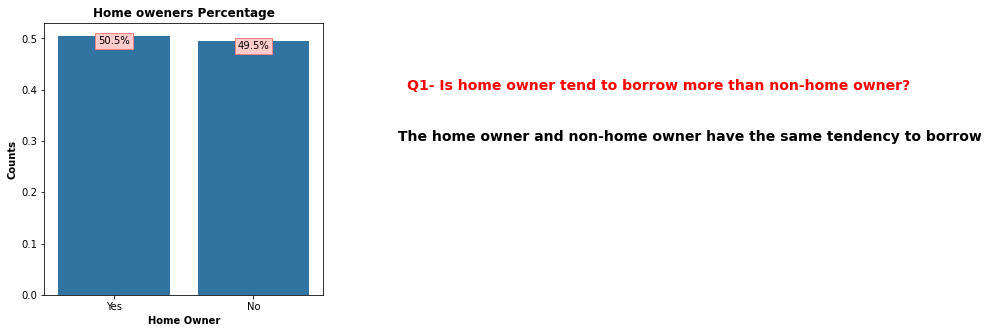

In [46]:
## 5- home owner 

home_own = loan_data.home_owner.value_counts()/loan_data.home_owner.shape[0]
home_own_values = home_own.values

plt.figure(figsize=[5,5])
sb.barplot( y=home_own.values,x=home_own.index ,color = sb.color_palette()[0])
plt.xlabel('Home Owner',weight = 'bold')
plt.ylabel('Counts',weight='bold')
plt.title('Home oweners Percentage',weight='bold',size=12)
text2='Q1- Is home owner tend to borrow more than non-home owner?'
plt.text(2.1,0.4,text2,size=14,weight='bold',color='r')
text3=' The home owner and non-home owner have the same tendency to borrow'
plt.text(2,0.3,text3,size=14,weight='bold')
for i in range(len(home_own_values)):
    text =  str(home_own_values[i].round(3)*100)+'%'
    plt.text(y=home_own_values[i],x=i , s=text ,ha='center',va='top',bbox=dict(boxstyle="square",ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8)))

**The home owner and non_home owner nearly have the same tendency to borrow money**

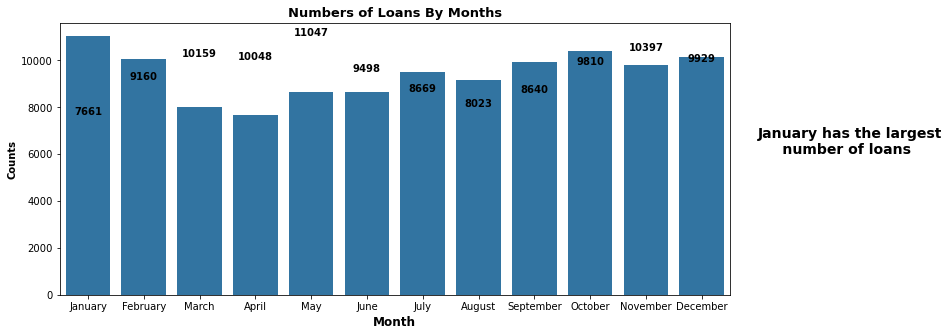

In [47]:
## 6- month name 
month_value = loan_data.month_name.value_counts().sort_index().values


## convert month and quarter into ordered categorical Var

month_order = ['January','February','March', 'April' ,'May' ,'June','July','August','September','October','November','December']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = month_order)
loan_data['month_name'] = loan_data['month_name'].astype(ordered_var)


plt.figure(figsize=[12,5])
sb.countplot(data = loan_data , x='month_name',color = sb.color_palette()[0])
plt.xlabel('Month',weight = 'bold',size=12)
plt.ylabel('Counts',weight='bold')
plt.title('Numbers of Loans By Months',weight='bold',size=13)
text2='January has the largest\n' + '     ' +  'number of loans'
plt.text(12,6000,text2,size=14,weight='bold')
for i in range(len(month_value)):
    text = str(month_value[i])
    plt.text(x=i ,y=month_value[i],s=text ,ha='center',weight='bold')

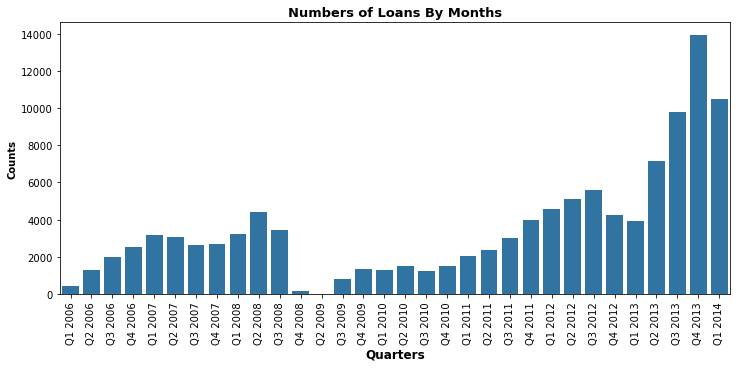

In [48]:
### quarters of the years 

plt.figure(figsize=[12,5])
sb.countplot(data =loan_data ,x='loan_quarter' ,color = sb.color_palette()[0])
plt.xlabel('Quarters',weight = 'bold',size=12)
plt.ylabel('Counts',weight='bold')
plt.title('Numbers of Loans By Months',weight='bold',size=13)
plt.xticks(rotation=90);

**Growth rate of loans numbers varies over years. Generally loans numbers gradually increased at 2016 and 2017 ,but the big drop stared at the last quarter of 2018 and continue untill 3rd quarter of 2019. After that the numbers continue to grow untill anthor small drop at 2012 then continue to increase again** 

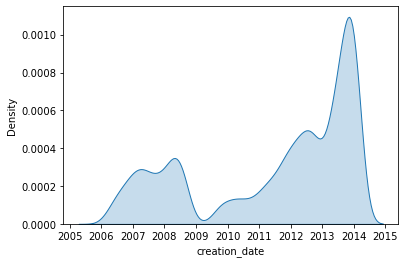

In [49]:
## creation date 

sb.kdeplot(data =loan_data ,x='creation_date' ,shade=True);

## 2- Bivariate 

### Scatter Matrices

In [50]:
columns_numeric = ['term','borrower_APR', 'interest_rate','monthly_income', 'loan_amount', 'monthly_loan_payment',
                   'estimated_return']

In [51]:
## taking a sample from loan data 

loan_sample = loan_data.sample(1000)

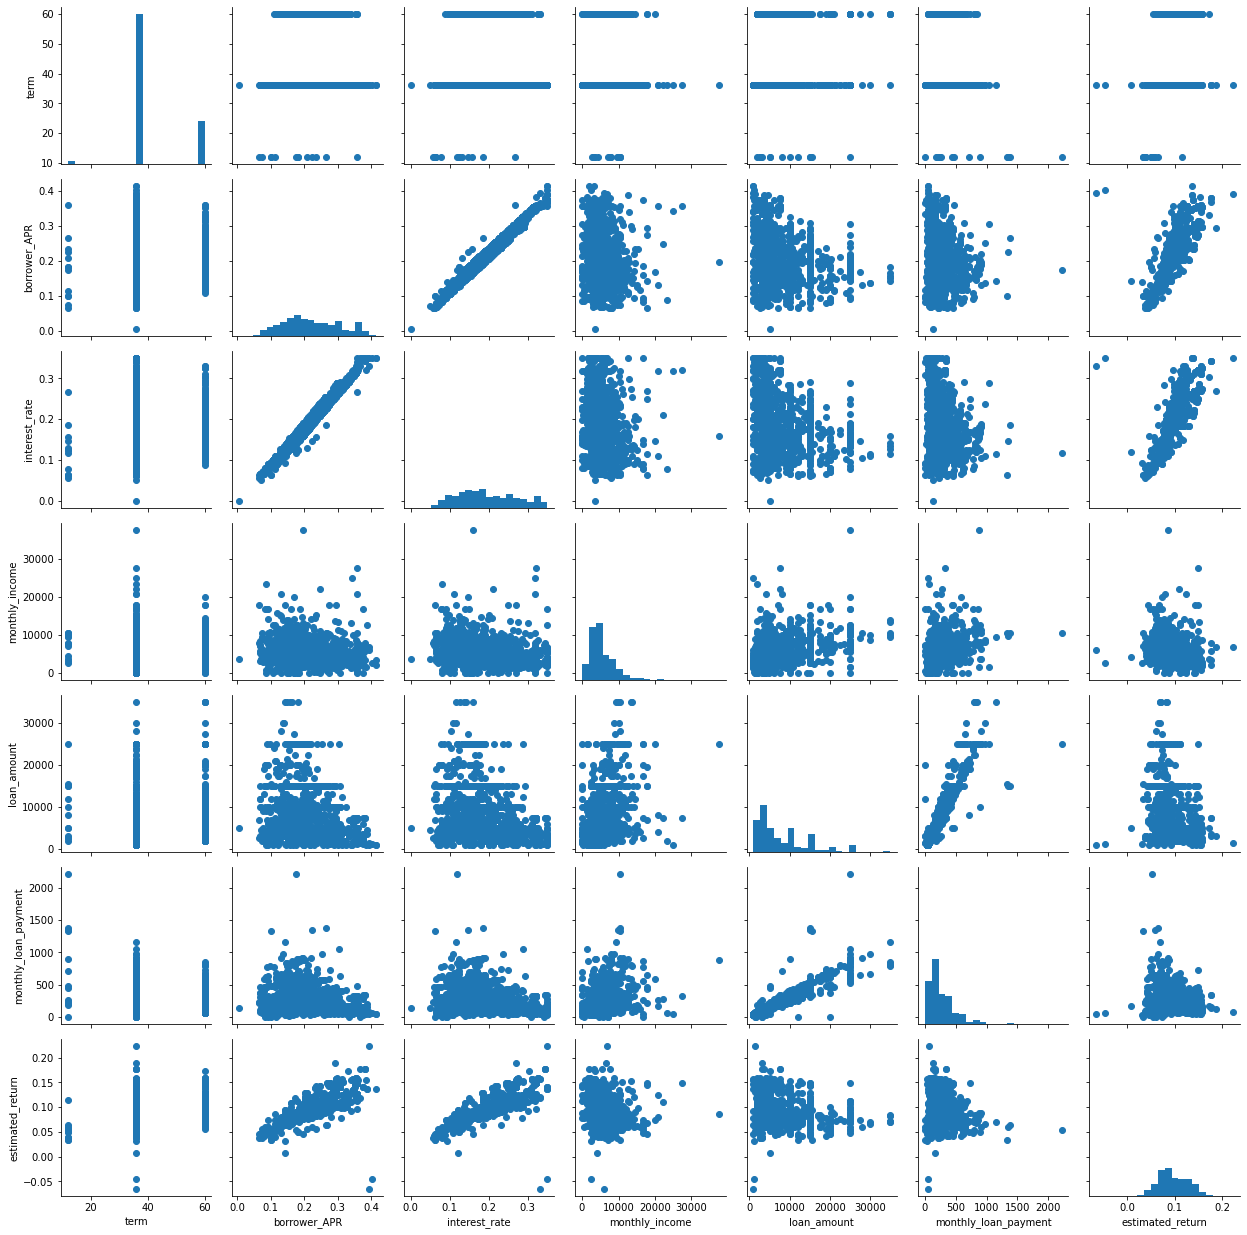

In [52]:
### plotting a scatter chart for all numbric vars to see if any possible relationships need more investigations

g=sb.PairGrid(data = loan_sample,vars= columns_numeric )
g=g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter);

### Loan_amount & interest_rate

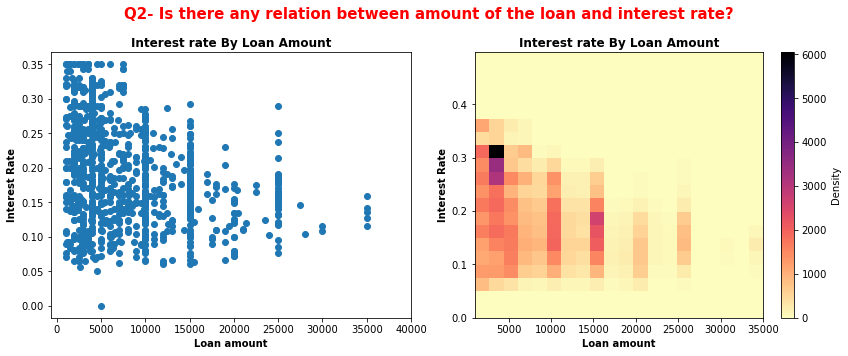

In [53]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(data = loan_sample ,x='loan_amount', y='interest_rate' )
ticks=np.arange(0,36000+5000,5000)
plt.xticks(ticks,ticks)
plt.xlabel('Loan amount',weight='bold')
plt.ylabel('Interest Rate',weight='bold')
plt.title('Interest rate By Loan Amount',weight='bold')

plt.subplot(1,2,2)
plt.hist2d(data = loan_data ,x='loan_amount' ,y='interest_rate' ,cmin=0 ,cmap = 'magma_r' ,bins = 20)
plt.colorbar(label='Density')
plt.xlabel('Loan amount' ,weight='bold')
plt.ylabel('Interest Rate',weight='bold');
plt.title('Interest rate By Loan Amount',weight='bold')

plt.suptitle('Interest Rate By Loan Amounts',weight='bold',size=15)
plt.suptitle('Q2- Is there any relation between amount of the loan and interest rate?',weight='bold',size=15,color='r')
plt.tight_layout()
plt.show()

### The charts illustrate that there is a negative correlation between loan_amount and interest_rate mean that with increasing in loan_amount the interest rate will decrease.


### Loan_amount & loan_category

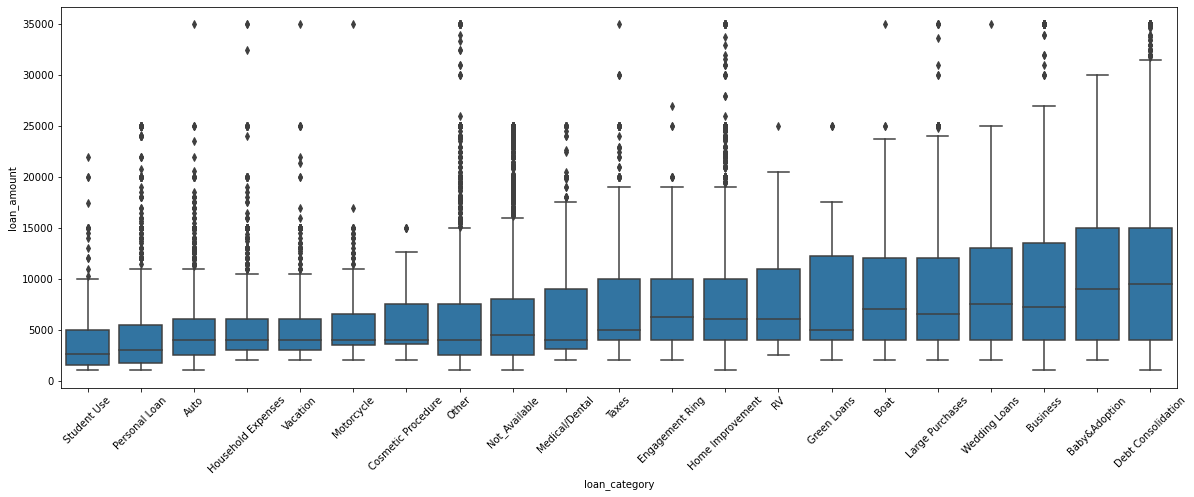

In [54]:
## this is a relation between quantitative var and qualitative var so i will use violin plot
loan_cat_amou_mean =  loan_data.groupby('loan_category',as_index=False)['loan_amount'].mean()
loan_cat_amou_mean.sort_values('loan_amount',inplace=True)
cat_order = loan_cat_amou_mean.loan_category.values


plt.figure(figsize=[20,7])
sb.boxplot(data = loan_data ,x='loan_category' ,y='loan_amount',order=cat_order ,color=sb.color_palette()[0])
plt.xticks(rotation = 45);

**This illustrate that on Average Debt Consolidation Category has largest loan amounts and Student Use has smallest loan amounts**

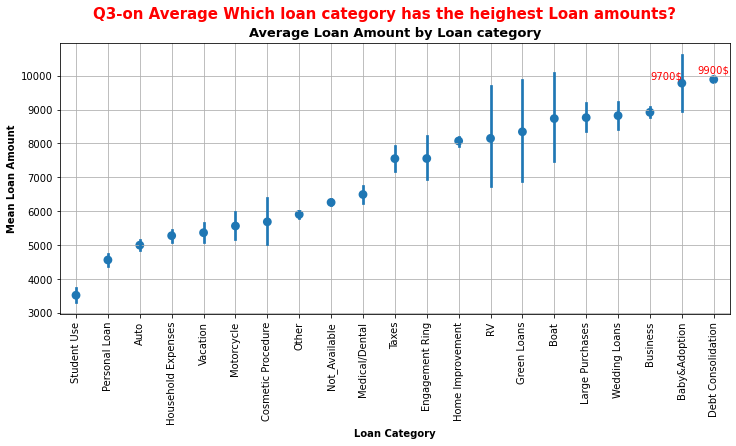

In [55]:
plt.figure(figsize=[12,5])

sb.pointplot(data = loan_data ,y='loan_amount',x='loan_category',linestyles=' ',order=cat_order)
plt.xticks(rotation = 90)
plt.title('Average Loan Amount by Loan category' ,fontsize = 13 ,weight ='bold')
plt.xlabel('Loan Category' ,weight ='bold')
plt.ylabel('Mean Loan Amount',weight = 'bold')
plt.suptitle('Q3-on Average Which loan category has the heighest Loan amounts?',weight = 'bold',size=15,color='r')
plt.grid()
plt.text(19.5,10100,s='9900$',color='r')
plt.text(18,9900,s='9700$',color='r');

**This chart show the mean loan amount and loan category which illustrate that heighest average of loans taken for (debt consolidation then baby&adoptation)**

### Quarter and loan amounts

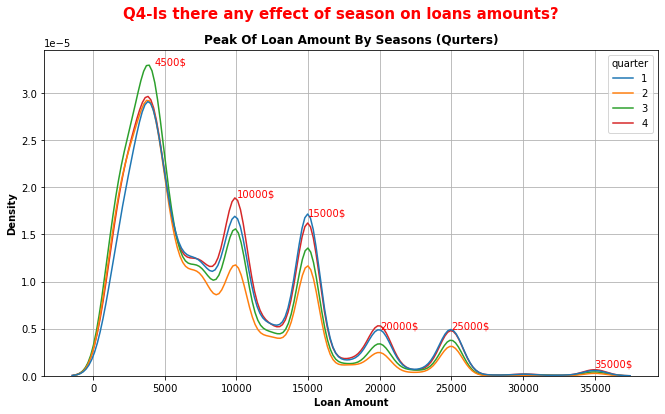

In [56]:
plt.figure(figsize=[11,6])
sb.kdeplot(data = loan_data ,x='loan_amount' ,hue = 'quarter')
plt.xlabel('Loan Amount' ,weight ='bold')
plt.ylabel('Density' ,weight = 'bold')
plt.grid()
plt.title('Peak Of Loan Amount By Seasons (Qurters)' ,fontsize = 12 ,weight ='bold')
plt.suptitle('Q4-Is there any effect of season on loans amounts?',color='r',weight='bold' ,size=15)
plt.text(4300,(3.3)*(10**-5),'4500$',color='r')
plt.text(10000,(1.9)*(10**-5),'10000$',color='r')
plt.text(15000,(1.7)*(10**-5),'15000$',color='r')
plt.text(20000,(0.5)*(10**-5),'20000$',color='r')
plt.text(25000,(0.5)*(10**-5),'25000$',color='r')
plt.text(35000,(0.1)*(10**-5),'35000$',color='r');

### We can see from chart seasonality of loans Amounts : 
* **loans amounts from 3000 to 5000 increased during Qurter 3 (June, AUG, SEP)**
* **loans amounts at 10000 increased during Qurter 4 ( OCT, NOV, DEC)**
* **loans amounts at 15000 quarter 1 (JAN, FEB, MAR)** 


 ## Q5 - What is factors most effect on the default on The loan?





### I will mix Bivariate and  Multivariate EDA to answer my questions 

###  Loan status & loan_category

In [57]:
## encoding loan status into only 3 categorical levels : defaulted ,Not defaulted ,chargedoff

loan_data['status_2'] = loan_data.loan_status

status= {'status_2':{'Current':'Not Defaulted','Completed':'Not Defaulted','Past Due (1-15 days)':'Not Defaulted',
                     'Past Due (31-60 days)':'Not Defaulted',
                     'Past Due (61-90 days)':'Not Defaulted','Past Due (91-120 days)':'Not Defaulted',
                     'Past Due (16-30 days)':'Not Defaulted','FinalPaymentInProgress':'Not Defaulted',
                     'Past Due (>120 days)':'Not Defaulted','Cancelled':'Defaulted'}}

loan_data = loan_data.replace(status)

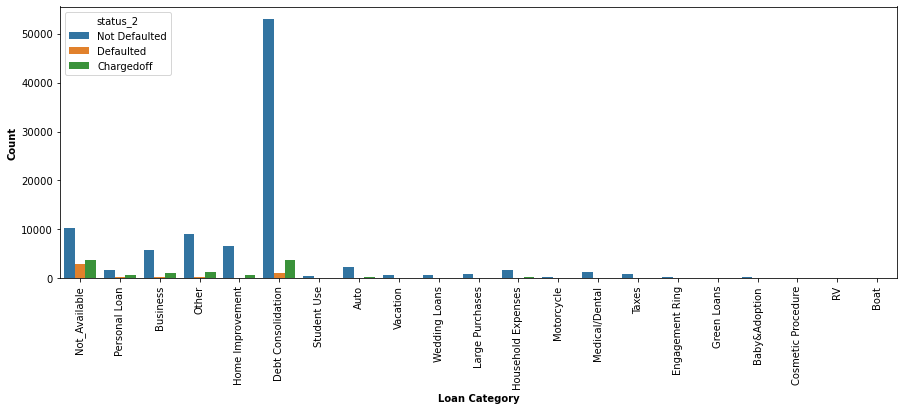

In [58]:
plt.figure(figsize=[15,5])
sb.countplot(data = loan_data ,x='loan_category' ,hue='status_2')
plt.xlabel('Loan Category',weight='bold')
plt.ylabel('Count',weight='bold')
plt.xticks(rotation = 90);

### Loan status & Monthly payments

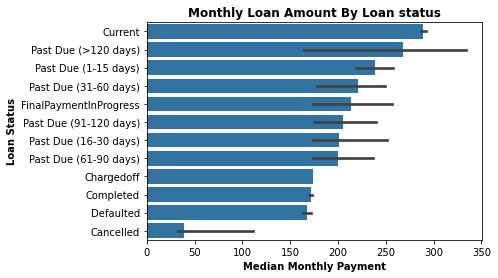

In [59]:
payment_mean = loan_data.groupby('loan_status',as_index=False)['monthly_loan_payment'].median()

payment_mean.sort_values('monthly_loan_payment',inplace=True,ascending=False)
order = payment_mean.loan_status.values

plt.figure()
sb.barplot(data = loan_data , y='loan_status' ,x='monthly_loan_payment',estimator=np.median ,color=sb.color_palette()[0],order = order)
plt.xlabel('Median Monthly Payment',weight='bold')
plt.ylabel('Loan Status',weight='bold')
plt.title('Monthly Loan Amount By Loan status',weight='bold',size=12);


**Monthly payments of loans not have much effect on the default status nor chargedoff status lets try another factor...**

### Loan status & borrower_APR

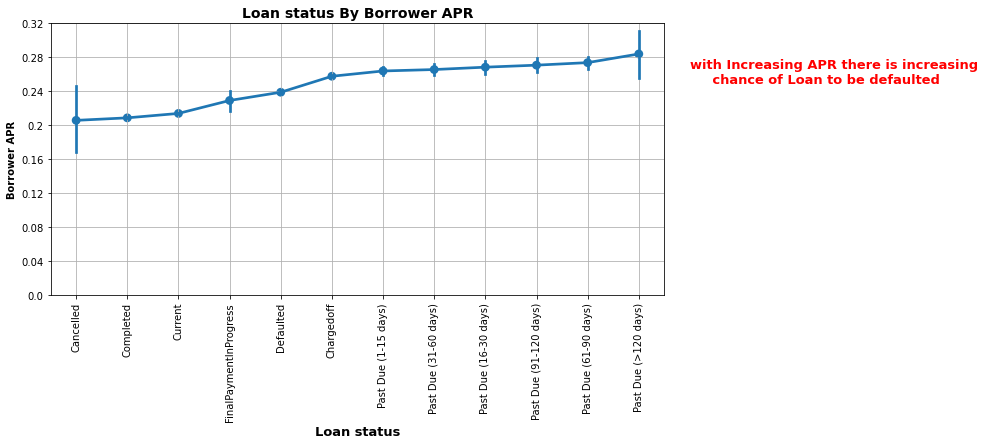

In [60]:
apr_mean = loan_data.groupby('loan_status',as_index=False)['borrower_APR'].mean()
apr_mean.sort_values('borrower_APR',inplace=True)
order = apr_mean.loan_status.values

plt.figure(figsize=[11,5])
sb.pointplot(data = loan_data , x='loan_status' ,y='borrower_APR' ,order = order)
ticks=np.arange(0 , 0.30+0.04 ,0.04)
plt.yticks(ticks,ticks)
plt.xlabel('Loan status',weight='bold',size=13)
plt.ylabel('Borrower APR',weight='bold')
plt.title('Loan status By Borrower APR',weight='bold',size=14)
plt.xticks(rotation = 90)
plt.grid()
text1='with Increasing APR there is increasing\n     chance of Loan to be defaulted'
plt.text(12,0.250,s=text1,size=13,color='r',weight='bold');

**here we can notice that the more borrower_APR is the more chance loan to be defaulted or person less able to pay it**

### loan status & terms

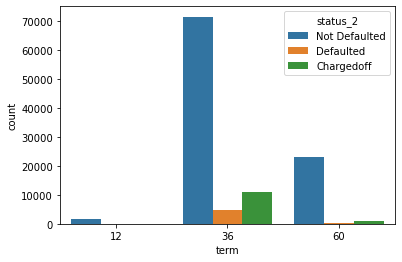

In [61]:
sb.countplot(data = loan_data ,x='term',hue='status_2');

### Monthly_loan payment & borrower_APR & loan status

In [62]:
## i will ananlyze monthly loan payments  and interest rate
### the goal of this analysis is to compairing monthly loan payments  and interest rate in default and non default 

defaulted = loan_data.query('loan_status=="Defaulted"')
non_defaulted = loan_data.query('loan_status !="Defaulted"')

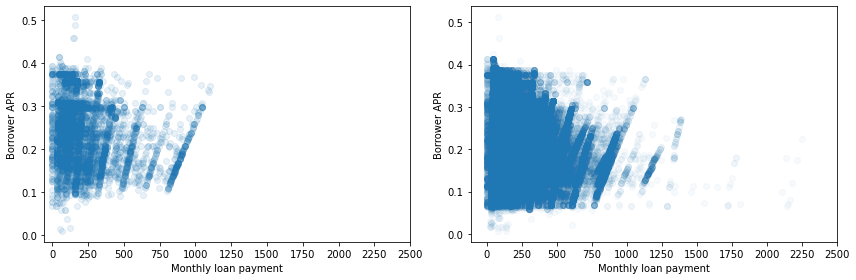

In [63]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(data = defaulted ,x='monthly_loan_payment' , y='borrower_APR',alpha=1/10)
ticks=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500]
plt.xticks(ticks,ticks)
plt.xlabel('Monthly loan payment')
plt.ylabel('Borrower APR')

plt.subplot(1,2,2)
plt.scatter(data = non_defaulted ,x='monthly_loan_payment' , y='borrower_APR',alpha=1/30)
ticks=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500]
plt.xticks(ticks,ticks)
plt.xlabel('Monthly loan payment')
plt.ylabel('Borrower APR')

plt.tight_layout()

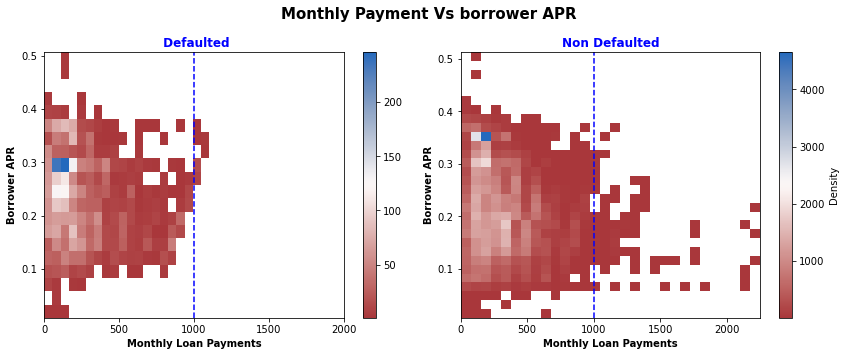

In [64]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.hist2d(data = defaulted ,x='monthly_loan_payment' , y='borrower_APR' ,cmin=1,cmap="vlag_r",bins=20)
ticks=[0,500,1000,1500,2000]
plt.xlabel('Monthly Loan Payments',weight='bold')
plt.ylabel('Borrower APR',weight='bold')
plt.xticks(ticks,ticks)
plt.colorbar()
plt.axvline(x=1000 ,ls = '--' , color ='b')
plt.title(' Defaulted',weight='bold',color = 'blue')

plt.suptitle('Monthly Payment Vs borrower APR',fontsize=15,weight='bold')   
  
    
plt.subplot(1,2,2)

plt.hist2d(data = non_defaulted ,x='monthly_loan_payment' , y='borrower_APR' ,cmin=1,cmap="vlag_r",bins=30)
ticks=[0,500,1000,1500,2000]
plt.xlabel('Monthly Loan Payments',weight='bold')
plt.ylabel('Borrower APR',weight='bold')
plt.title('Non Defaulted',weight='bold',color = 'blue')
plt.colorbar(label='Density')
plt.axvline(x=1000 ,ls = '--' , color ='b')
plt.tight_layout();


   **This indicates that Monthly loan payment above 1000 dollars have more risk of being defaulted ,
   Lets add another factor like Loan term to see the effect on loan default status......**

### monthly payments & borrower APR & term in defaulted and non defaulted loans

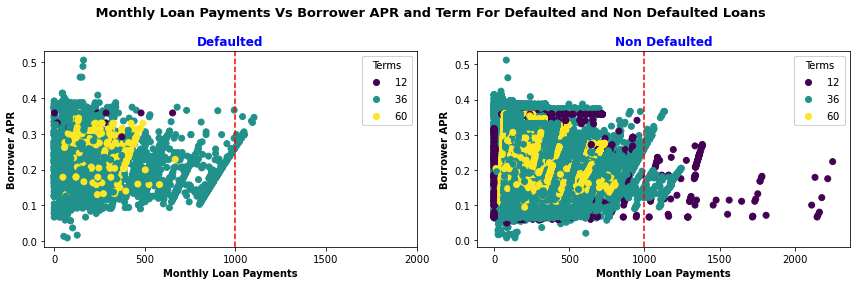

In [65]:
fig ,ax = plt.subplots(1,2,figsize=[12,4])

scatter = ax[0].scatter(data = defaulted ,x='monthly_loan_payment' ,y='borrower_APR',c='term');
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper right", title="Terms")
ax[0].add_artist(legend1)
ticks = [0,500,1000,1500,2000]
ax[0].set_xticks(ticks)
ax[0].set_xlabel('Monthly Loan Payments',weight='bold')
ax[0].set_ylabel('Borrower APR',weight = 'bold')
ax[0].set_title('Defaulted',weight = 'bold' ,fontsize=12 ,color = 'b')
ax[0].axvline(x=1000 ,ls = '--' , color ='r')


scatter = ax[1].scatter(data = non_defaulted ,x='monthly_loan_payment' ,y='borrower_APR',c='term');
legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="upper right", title="Terms")
ax[1].add_artist(legend1)
ticks = [0,500,1000,1500,2000]
ax[1].set_xticks(ticks)
ax[1].set_xlabel('Monthly Loan Payments',weight='bold')
ax[1].set_ylabel('Borrower APR',weight = 'bold')
ax[1].set_title('Non Defaulted',weight = 'bold' ,fontsize=12 ,color = 'b')
ax[1].axvline(x=1000 ,ls = '--' , color ='r')

plt.suptitle(' Monthly Loan Payments Vs Borrower APR and Term For Defaulted and Non Defaulted Loans',weight='bold',fontsize=13)
plt.tight_layout()
plt.show()


### Conclusion for answering Question 5:
**From this chart we can conclude that long loan terms (36 and 60) and monthly payments less than 1000 dollars are more risk to be defaulted, so Lenders should are advised to keep terms shorter terms (12 months) and monthly payments above 1000 dollars and APR less than or equal 40% to avoid defaulting loans**

## Q6- What is the factors that affect most on estimated return?

### Estimated return & terms

In [66]:
## first lets take a copy of my data and drop null data in estimated return column
loan_copy = loan_data.copy()
loan_copy.dropna(inplace=True)

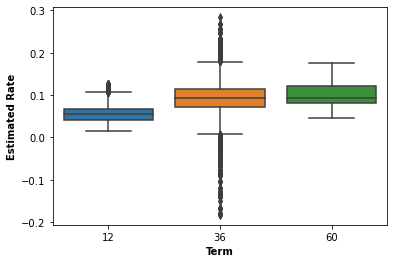

In [67]:
sb.boxplot(data = loan_data ,x='term' ,y='estimated_return')
plt.xlabel('Term',weight='bold')
plt.ylabel('Estimated Rate',weight='bold');

**There is a trending here, this chart illustrate that increasing in terms lead to increasing in estmated returns
I think we need more diging We need more diging......**

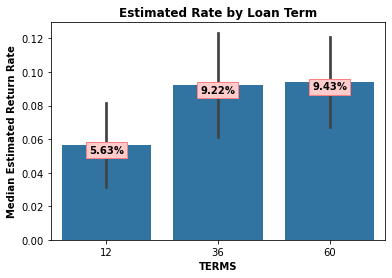

In [68]:
## esimated return percentage
values = loan_copy.groupby('term')['estimated_return'].median().values


color = sb.color_palette()[0]
sb.barplot(data = loan_copy ,x='term' ,y='estimated_return',estimator=np.median ,color = color ,ci='sd')
plt.xlabel('TERMS',weight = 'bold')
plt.ylabel('Median Estimated Return Rate',weight = 'bold')
plt.title('Estimated Rate by Loan Term' ,weight = 'bold' ,fontsize=12)

for i in range(len(values)):
    text = str(values[i].round(4)*100) + '%'
    plt.text(x=i ,y=values[i],s=text,ha ='center',weight = 'bold',va='top',bbox=dict(boxstyle="square",ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8)))


#### This prove the previous points that the average estmated return increase with increasing terms

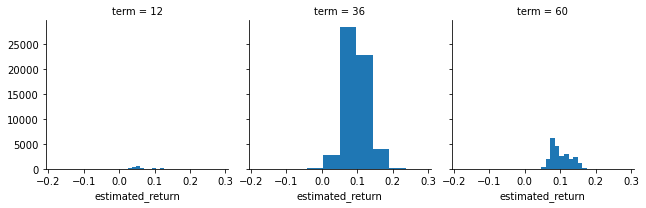

In [69]:
g=sb.FacetGrid(data = loan_copy ,col='term')
g.map(plt.hist,'estimated_return');

### conclusion
* **1-terms 12 months have estimated return between (2% and 12%) with median of 5.5% and STD of 0.024**
* **2-terms 36 months have estimated return between (-9% and 22%)with median of 9.26% and STD of 0.035**
* **3-terms 60 months have estimated return between ( 5% and 16%)with median of 10.8% and STD of 0.028**

#### Generally the 60 months loan term have a higher average estimated return ,but 36 months term have a wider range of estimated return rate



**I think we need more digging to see if there is any risks related to each terms**

<span style = 'color:red'>**Lets see which category is more associated with risk of being defaulted or chargedoff**</span>  

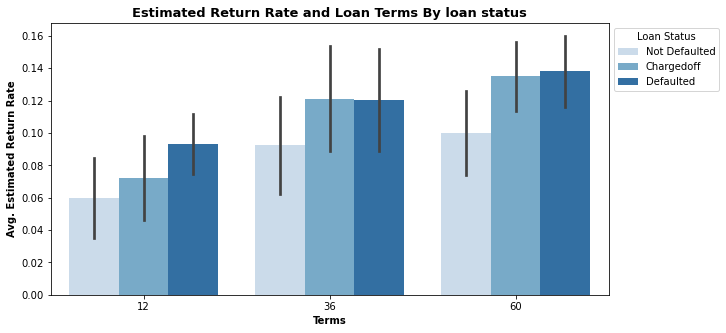

In [70]:
plt.figure(figsize=[10,5])

sb.barplot(data = loan_copy ,x='term' ,y='estimated_return',hue='status_2',palette='Blues'  ,ci='sd')
plt.legend(title='Loan Status', bbox_to_anchor=(1,1))
plt.xlabel('Terms',weight = 'bold')
plt.ylabel('Avg. Estimated Return Rate',weight='bold')
plt.title('Estimated Return Rate and Loan Terms By loan status',weight ='bold',fontsize=13);

**Here we can see that higher loan terms are associated with higher estimated return but also with a higher risks of being defaulted or chargedoff ,SO if you are an invistor the best advise would be to invest in loans with repeated small terms(12) and lower revenue rather than long terms loan with high revenue**


### Q7- Is there in differenc on interest rate between student loan and non-students loan?

###  Interest rate & Loan amount for student and non_student Loans

In [71]:
# encoding student loan and non student loan as two datasets

student_loan = loan_data.query('loan_category=="Student Use"')
non_student_loan = loan_data.query('loan_category!="Student Use"')

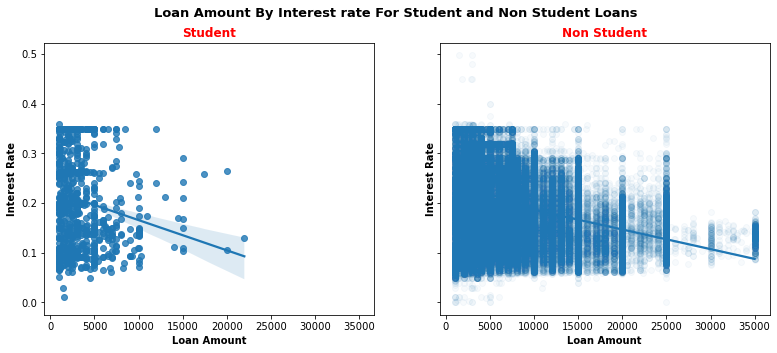

In [72]:
fig, ax = plt.subplots(1, 2, sharex=True,sharey=True, figsize=(13,5))

sb.regplot(data=student_loan ,x='loan_amount' ,y='interest_rate',ax=ax[0])
ax[0].set_xlabel('Loan Amount',weight='bold')
ax[0].set_ylabel('Interest Rate',weight='bold')
ax[0].set_title('Student',weight='bold',size=12,color='r')

sb.regplot(data=non_student_loan ,x='loan_amount' ,y='interest_rate',scatter_kws={'alpha':1/30},ax=ax[1])
ax[1].set_xlabel('Loan Amount',weight='bold')
ax[1].set_ylabel('Interest Rate',weight='bold')
ax[1].set_title('Non Student',weight='bold',size=12,color='r')

plt.suptitle('Loan Amount By Interest rate For Student and Non Student Loans',weight='bold',size=13);

### There is no difference in trending of interest rate between student loans and non_student loans both have negative correlation

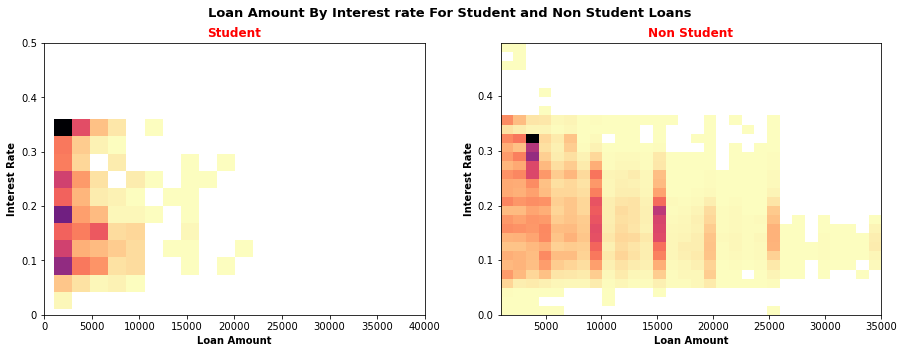

In [73]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2,1)

plt.hist2d(data=student_loan ,x='loan_amount' ,y='interest_rate',cmap='magma_r',cmin=0.2,bins=11)

ticks1=[0,0.1,0.2,0.3,0.4,0.5]
plt.yticks(ticks1,ticks1)
ticks2=[0,5000,10000,15000,20000,25000,30000,35000,40000]
plt.xticks(ticks2,ticks2)
plt.xlabel('Loan Amount',weight='bold')
plt.ylabel('Interest Rate',weight='bold')
plt.title('Student',weight='bold',size=12,color='r')

plt.subplot(1, 2,2)
plt.hist2d(data=non_student_loan ,x='loan_amount' ,y='interest_rate',cmap='magma_r',cmin=0.5,bins=30)
plt.xlabel('Loan Amount',weight='bold')
plt.ylabel('Interest Rate',weight='bold')
plt.title('Non Student',weight='bold',size=12,color='r')
plt.suptitle('Loan Amount By Interest rate For Student and Non Student Loans',weight='bold',size=13);

#### This confirm the previous concept 